2022年1月17日 記載

初めまして、B4のTです。
JoSIMの使い方とPythonでWrapperを作成したのでこちらに記していきます。

In [23]:
netlist="""

.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

* PYSQUID=====================================
.subckt psquid1        3  5 
L1                 3         1   1.69pH fcheck
L2                 3         4   1.69pH fcheck
B1                 1         5   jjmod area=0.41
R1                 1         5   18.91ohm
B2                 2         5   jjmod area=0.41
R2                 2         5   18.91ohm
B3                 4         2   pjjmod area=20
.ends

.subckt psquid2        3  5 
L1                 3         1   1.44pH fcheck
L2                 3         4   1.44pH fcheck
B1                 1         5   jjmod area=0.38
R1                 1         5   20.11ohm
B2                 2         5   jjmod area=0.38
R2                 2         5   20.11ohm
B3                 4         2   pjjmod area=20
.ends

.subckt psquid3        3  5 
L1                 3         1   1.64pH fcheck
L2                 3         4   1.64pH fcheck
B1                 1         5   jjmod area=0.5
R1                 1         5   19.48ohm
B2                 2         5   jjmod area=0.5
R2                 2         5   19.48ohm
B3                 4         2   pjjmod area=20
.ends
* ============================================

.subckt DCHFQ 1 6 100
* 250-350  750-850  1250-1350
Rin                     1        2    1394ohm
L0                      2        3    2pH fcheck
L1                      3        0    37.89pH fcheck
X1       psquid1         3        4
L3                      4        5    4.02pH fcheck
L4                      5        6    2.00pH fcheck
R1                      100      5    100ohm
X2       psquid2         6        0
.ends

.subckt JTL     1  5  100
L1               1  2   13.91pH fcheck
L2               2  3   13.91pH fcheck
L3               3  4   13.91pH fcheck
L4               4  5   13.91pH fcheck
X1    psquid3     3  0
X2    psquid3     5  0
R1               100  4   125.43ohm
.ends

.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL            3  4  100
X4       JTL            4  5  100
.ends

*** top cell:  
Vin                     1   0    PWL(0ps 0mV 440ps 0mV 450ps 25mV 550ps 25mV 560ps 0mV   840ps 0mV 850ps 25mV 950ps 25mV 960ps 0mV   1240ps 0mV 1250ps 25mV 1350ps 25mV 1360ps 0mV)
X1      DCHFQ           1   2  100
X2      JTL4            2   3   100
X3      JTL4            3   4   100
X4      JTL4            4   5   100

R2                      5     13  8.32ohm
L5                      13     0  2pH fcheck
Vb                      100    0  pwl(0ps 0mV 100ps 1.2mV)


**netlis file
.tran 1.0ps 2000ps 0ps 1ps

.print devv B1|X1|X1|X3
.print devv B2|X1|X1|X3

.print phase B1|X1|X1|X3
.print phase B2|X1|X1|X3
.end

**** optimize ****
* バイアス電圧の立ち上がり終了の時間
* EndTimeOfBiasRise=100e-12
* 初期パルスの入力開始時間
* StartTimeOfPulseInput=400e-12
"""

# Show the netlist data
print(netlist)



.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

* PYSQUID=====================================
.subckt psquid1        3  5 
L1                 3         1   1.69pH fcheck
L2                 3         4   1.69pH fcheck
B1                 1         5   jjmod area=0.41
R1                 1         5   18.91ohm
B2                 2         5   jjmod area=0.41
R2                 2         5   18.91ohm
B3                 4         2   pjjmod area=20
.ends

.subckt psquid2        3  5 
L1                 3         1   1.44pH fcheck
L2                 3         4   1.44pH fcheck
B1                 1         5   jjmod area=0.38
R1                 1         5   20.11ohm
B2                 2         5   jjmod area=0.38
R2                 2         5   20.11ohm
B3                 4         2   pjjmod area=20
.ends

.subckt psquid3        3  5 
L1                 3        

pyjosimという簡単なJoSIMのWrapperパッケージを作成しました。こちらをインポートしてください。

In [24]:
from pyjosim.pyjosim import simulation

df = simulation(netlist)

# Show dataframe
print(df)

              V(B1|X1|X1|X3)  V(B2|X1|X1|X3)
time                                        
0.000000e+00    1.624411e-07    5.100156e-07
1.000000e-12    8.555142e-07    5.683449e-07
2.000000e-12    7.891817e-07    7.617216e-07
3.000000e-12    6.850263e-07    7.577397e-07
4.000000e-12    6.537384e-07    6.760284e-07
...                      ...             ...
1.995000e-09   -1.811882e-05    1.237539e-05
1.996000e-09   -1.811882e-05    1.237539e-05
1.997000e-09   -1.811882e-05    1.237539e-05
1.998000e-09   -1.811882e-05    1.237539e-05
1.999000e-09   -1.811882e-05    1.237539e-05

[2000 rows x 2 columns]


<AxesSubplot:xlabel='time'>

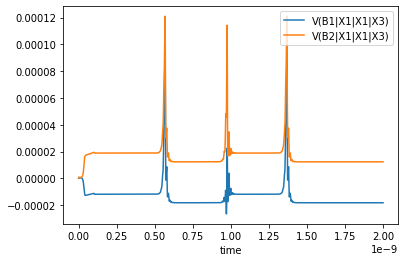

In [25]:
df.plot()